In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df= pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
print(df.shape)
df.describe()

(96, 4)


,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [9]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [12]:
df.rename({"Life expectancy at birth (years)": "L_expectancy"}, inplace=True, axis=1)

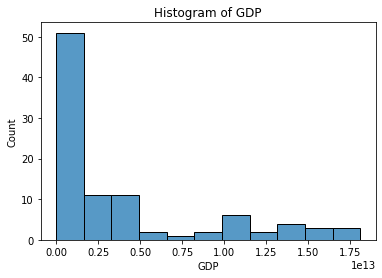

<Figure size 432x288 with 0 Axes>

In [16]:
sns.histplot(x="GDP" , data=df)
plt.title("Histogram of GDP")
plt.show()
plt.clf()

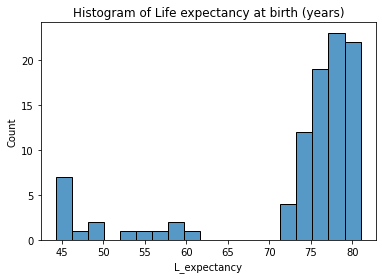

<Figure size 432x288 with 0 Axes>

In [21]:
sns.histplot(df.L_expectancy)
plt.title("Histogram of Life expectancy at birth (years)")
plt.show()
plt.clf()

In [29]:
Means_country = df.drop("Year",axis=1).groupby("Country").mean().reset_index()
Means_country

,Country,L_expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


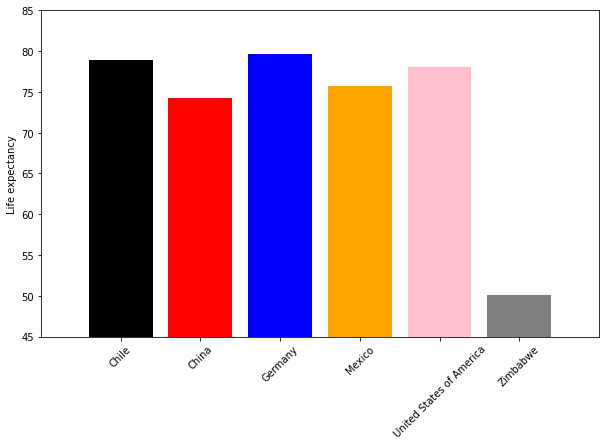

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(10,6))
plt.bar(range(6), Means_country.L_expectancy, color=["black", "red", "blue", "orange", "pink", "grey"])
ax= plt.subplot()
ax.set_xticks(range(6))
ax.set_xticklabels(Means_country.Country, rotation=45)
plt.ylabel("Life expectancy")
plt.axis([-1,6,45,85])
plt.show()
plt.clf()

Text(0.5, 1.0, 'GDP in trillions of US dollars per country')

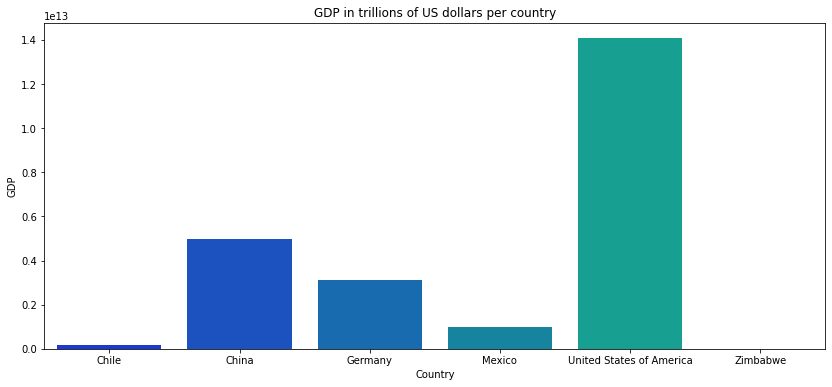

In [47]:
plt.figure(figsize=(14,6))
sns.barplot(x="Country", y="GDP", data=Means_country, palette="winter")
plt.title("GDP in trillions of US dollars per country")

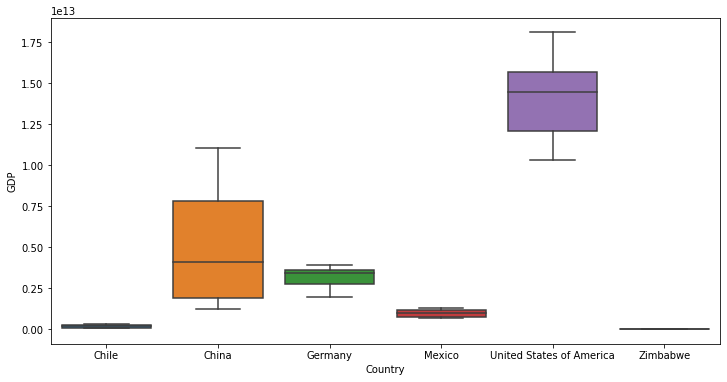

<Figure size 432x288 with 0 Axes>

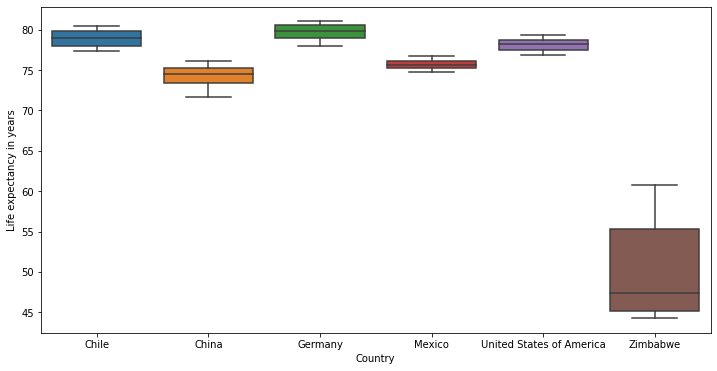

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Country", y="GDP", data= df)
plt.show()
plt.clf()

plt.figure(figsize=(12,6))
sns.boxplot(x="Country", y="L_expectancy", data=df)
plt.ylabel("Life expectancy in years")
plt.show()
plt.clf()

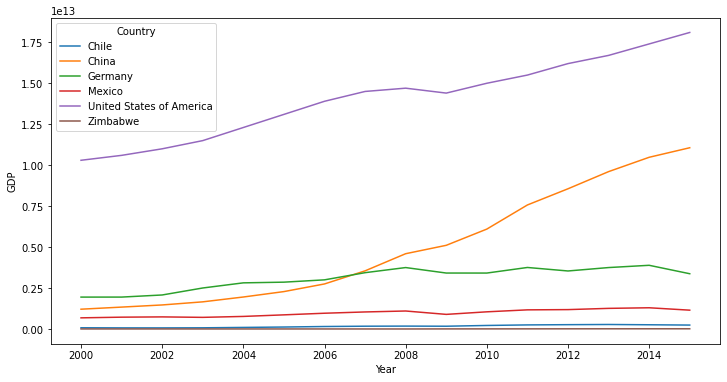

<Figure size 432x288 with 0 Axes>

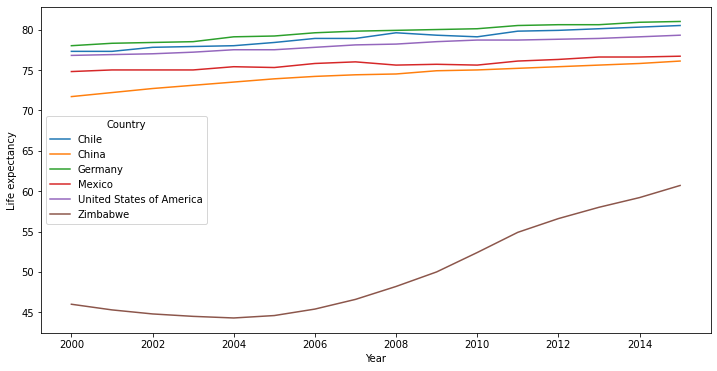

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize= (12,6))
sns.lineplot(x="Year", y="GDP", hue="Country", data=df)
plt.show()
plt.clf()

plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="L_expectancy", hue="Country", data=df )
plt.ylabel("Life expectancy")
plt.show()
plt.clf()

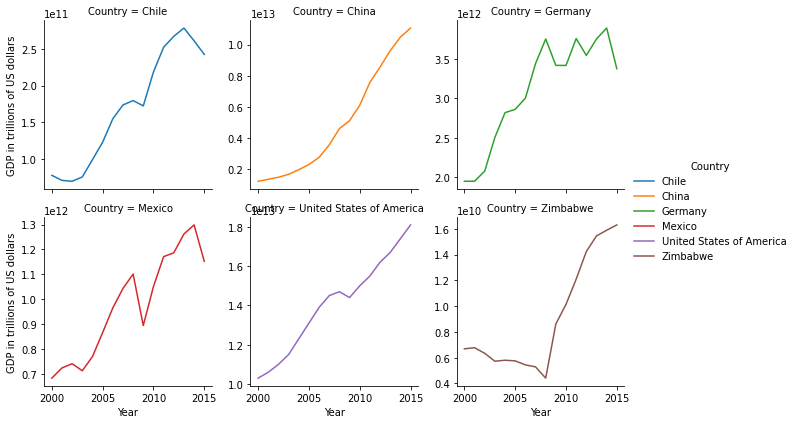

In [82]:
sns.FacetGrid(df,col="Country", hue="Country", col_wrap=3, sharey=False).map(sns.lineplot, "Year", \
                                                "GDP").set_axis_labels("Year", "GDP in trillions of US dollars").add_legend()

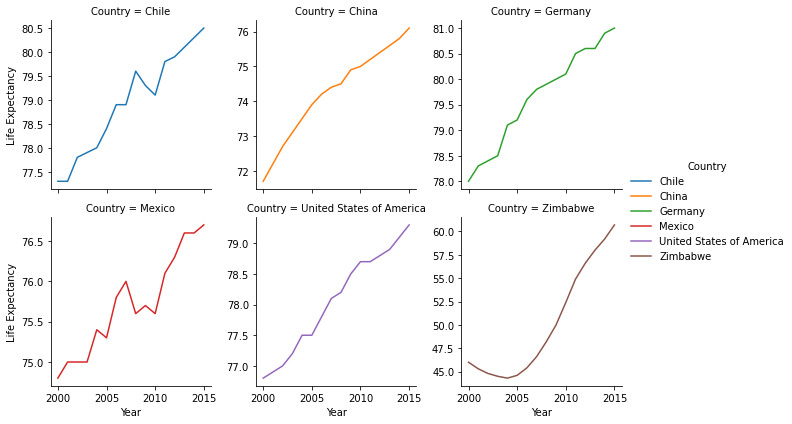

In [85]:
obj1= sns.FacetGrid(df, col="Country", hue="Country", col_wrap=3, sharey=False).map(sns.lineplot,"Year", "L_expectancy")
obj1.set_axis_labels("Year", "Life Expectancy").add_legend()


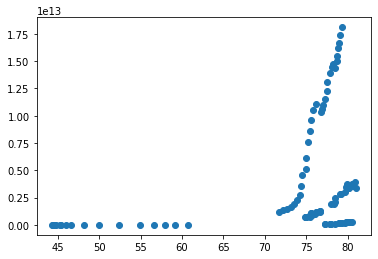

In [89]:
plt.scatter( df.L_expectancy, df.GDP)
plt.show()

In [86]:
print(df.columns)

Index(['Country', 'Year', 'L_expectancy', 'GDP'], dtype='object')


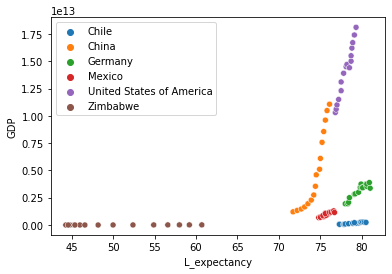

In [91]:
sns.scatterplot(x="L_expectancy", y= "GDP", hue="Country", data=df).legend()

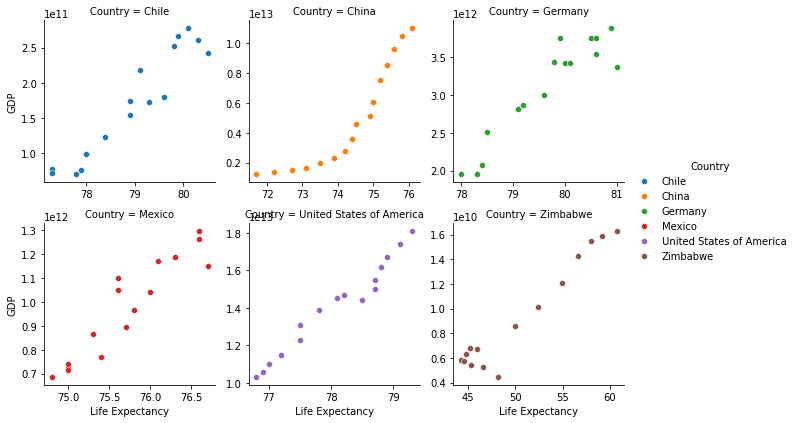

In [95]:
obj1 = sns.FacetGrid(df, col="Country", hue="Country", col_wrap=3, sharey=False, sharex=False).map(sns.scatterplot,\
                                                                                                   "L_expectancy", "GDP")
obj1.add_legend().set_axis_labels("Life Expectancy" , "GDP")

In [96]:
print(df.corr())

                  Year  L_expectancy       GDP
Year          1.000000      0.155050  0.208288
L_expectancy  0.155050      1.000000  0.343207
GDP           0.208288      0.343207  1.000000


**Conclusions**


- Zimbabwe had the greatest increase in life expectancy
- China had the greatest increase in GDP
- There is a positive correlation between life expectancy and GDP
- Average life expectancy is greatest in Germany
- Zimbabwe's life expectancy distribution 